In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Abundances

## Sample

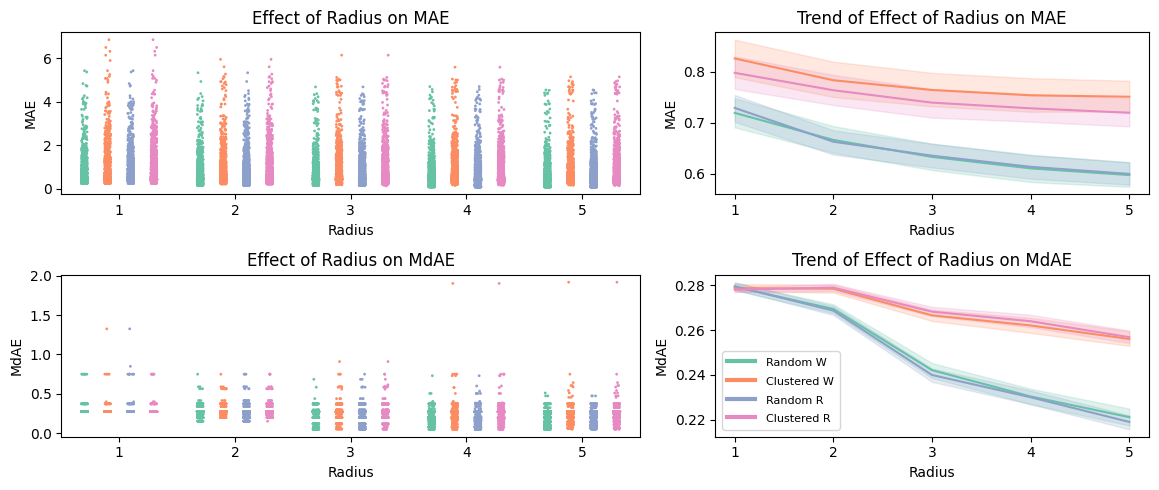

In [136]:
from matplotlib.gridspec import GridSpec

df1 = pd.read_csv('../experiments/analysis_out/abundances_sample_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/abundances_sample_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
df2['sampling_strat'] = 'reg'
# Combine df1 and df2 into a single DataFrame
df_combined = pd.concat([df1, df2])
df_combined['setup'] = df_combined["distribution"] + df_combined["sampling_strat"]

fig = plt.figure(figsize=(11.69,5))

gs = GridSpec(2, 2, width_ratios=[4, 3], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax1, legend=False)
ax1.set_title('Effect of Radius on MAE')
ax1.set_xlabel('Radius')
ax1.set_ylabel('MAE')

g = sns.lineplot(x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax2, legend=False)
ax2.set_title('Trend of Effect of Radius on MAE')
ax2.set_xlabel('Radius')
ax2.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax3, legend=False)
ax3.set_title('Effect of Radius on MdAE')
ax3.set_xlabel('Radius')
ax3.set_ylabel('MdAE')

g = sns.lineplot(x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax4)
ax4.set_title('Trend of Effect of Radius on MdAE')
ax4.set_xlabel('Radius')
ax4.set_ylabel('MdAE')
g.set_xticks([1, 2, 3, 4, 5])
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
new_labels = ['Random W', 'Clustered W', 'Random R', 'Clustered R']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')


# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
plt.savefig("5-abundances_sample.pdf", format="pdf", bbox_inches="tight")
plt.show()

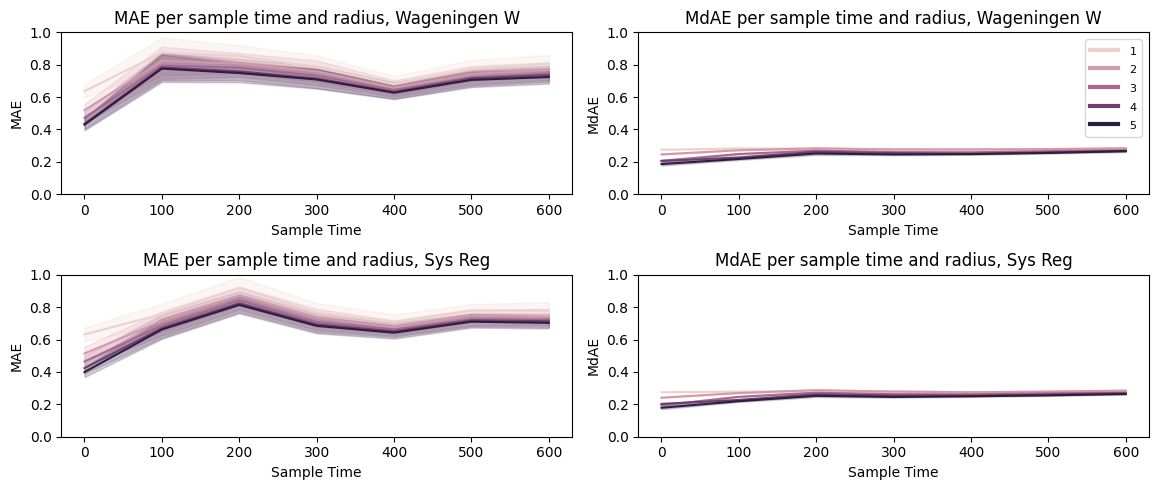

In [137]:
df1 = pd.read_csv('../experiments/analysis_out/abundances_sample_w.csv')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/abundances_sample_reg.csv')
df2['sampling_strat'] = 'reg'
# Combine df1 and df2 into a single DataFrame
df_combined = pd.concat([df1, df2])

# Set up the matplotlib figure with a 4x4 grid (2x2 plots: mae_w, mae_reg, mdae_w, mdae_reg)
fig, axes = plt.subplots(2, 2, figsize=(11.69,5))

# Plot [mae, w]
sns.lineplot(x='sample_time', y='mae', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 0], legend=False)
axes[0, 0].set_title('MAE per sample time and radius, Wageningen W')
axes[0, 0].set_xlabel('Sample Time')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_ybound(0, 1)

## Plot [mae, reg]
g = sns.lineplot(x='sample_time', y='mdae', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 1])
axes[0, 1].set_title('MdAE per sample time and radius, Wageningen W')
axes[0, 1].set_xlabel('Sample Time')
axes[0, 1].set_ylabel('MdAE')
axes[0, 1].set_ybound(0, 1)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
for t in g.legend_.texts:
    t.set_fontsize('8')
    
#
## Plot [mdae, w]
sns.lineplot(x='sample_time', y='mae', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 0], legend=False)
axes[1, 0].set_title('MAE per sample time and radius, Sys Reg')
axes[1, 0].set_xlabel('Sample Time')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_ybound(0, 1)
#
## Plot [mae, reg]
sns.lineplot(x='sample_time', y='mdae', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 1], legend=False)
axes[1, 1].set_title('MdAE per sample time and radius, Sys Reg')
axes[1, 1].set_xlabel('Sample Time')
axes[1, 1].set_ylabel('MdAE')
axes[1, 1].set_ybound(0, 1)

# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
#plt.suptitle('Abundance No Pooling', y=1.05)
plt.savefig("5-abundances_st_sample.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Plot

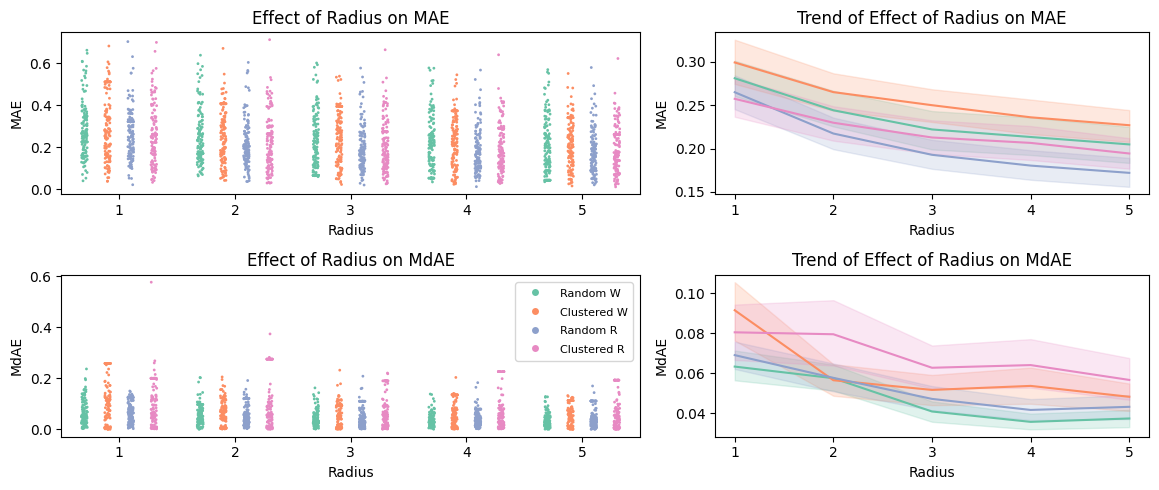

In [138]:
df1 = pd.read_csv('../experiments/analysis_out/abundances_plot_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/abundances_plot_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
df2['sampling_strat'] = 'reg'
df_combined = pd.concat([df1, df2])
df_combined['setup'] = df_combined["distribution"] + df_combined["sampling_strat"]

fig = plt.figure(figsize=(11.69,5))

gs = GridSpec(2, 2, width_ratios=[4, 3], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax1, legend=False)
ax1.set_title('Effect of Radius on MAE')
ax1.set_xlabel('Radius')
ax1.set_ylabel('MAE')

g = sns.lineplot(x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax2, legend=False)
ax2.set_title('Trend of Effect of Radius on MAE')
ax2.set_xlabel('Radius')
ax2.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])

# Plot [mae, w]
g = sns.stripplot(size=2, dodge=True, x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax3, legend=True)
ax3.set_title('Effect of Radius on MdAE')
ax3.set_xlabel('Radius')
ax3.set_ylabel('MdAE')
for lh in g.legend_.legend_handles:
    lh.set_markersize('5')
g.legend_.set_title('')
new_labels = ['Random W', 'Clustered W', 'Random R', 'Clustered R']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')

g = sns.lineplot(x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax4, legend=False)
ax4.set_title('Trend of Effect of Radius on MdAE')
ax4.set_xlabel('Radius')
ax4.set_ylabel('MdAE')
g.set_xticks([1, 2, 3, 4, 5])


# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
plt.savefig("5-abundances_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

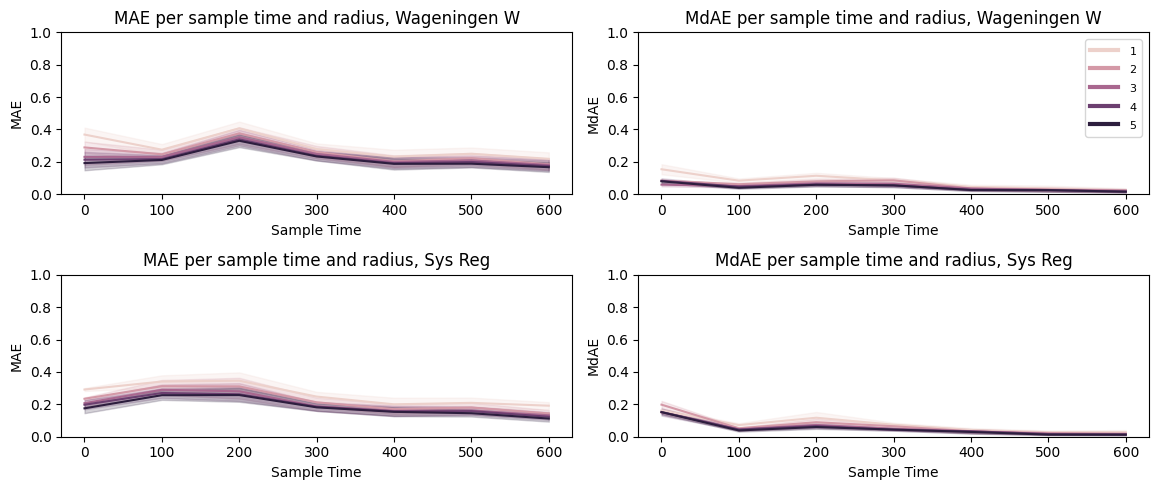

In [139]:
df1 = pd.read_csv('../experiments/analysis_out/abundances_plot_w.csv')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/abundances_plot_reg.csv')
df2['sampling_strat'] = 'reg'
# Combine df1 and df2 into a single DataFrame
df_combined = pd.concat([df1, df2])

# Set up the matplotlib figure with a 4x4 grid (2x2 plots: mae_w, mae_reg, mdae_w, mdae_reg)
fig, axes = plt.subplots(2, 2, figsize=(11.69,5))

# Plot [mae, w]
sns.lineplot(x='sample_time', y='mae', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 0], legend=False)
axes[0, 0].set_title('MAE per sample time and radius, Wageningen W')
axes[0, 0].set_xlabel('Sample Time')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_ybound(0, 1)

## Plot [mae, reg]
g = sns.lineplot(x='sample_time', y='mdae', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 1])
axes[0, 1].set_title('MdAE per sample time and radius, Wageningen W')
axes[0, 1].set_xlabel('Sample Time')
axes[0, 1].set_ylabel('MdAE')
axes[0, 1].set_ybound(0, 1)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
for t in g.legend_.texts:
    t.set_fontsize('8')
    
#
## Plot [mdae, w]
sns.lineplot(x='sample_time', y='mae', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 0], legend=False)
axes[1, 0].set_title('MAE per sample time and radius, Sys Reg')
axes[1, 0].set_xlabel('Sample Time')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_ybound(0, 1)
#
## Plot [mae, reg]
sns.lineplot(x='sample_time', y='mdae', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 1], legend=False)
axes[1, 1].set_title('MdAE per sample time and radius, Sys Reg')
axes[1, 1].set_xlabel('Sample Time')
axes[1, 1].set_ylabel('MdAE')
axes[1, 1].set_ybound(0, 1)

# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
#plt.suptitle('Abundance Intra Plot Pooling', y=1.05)
plt.savefig("5-abundances_st_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Temporal

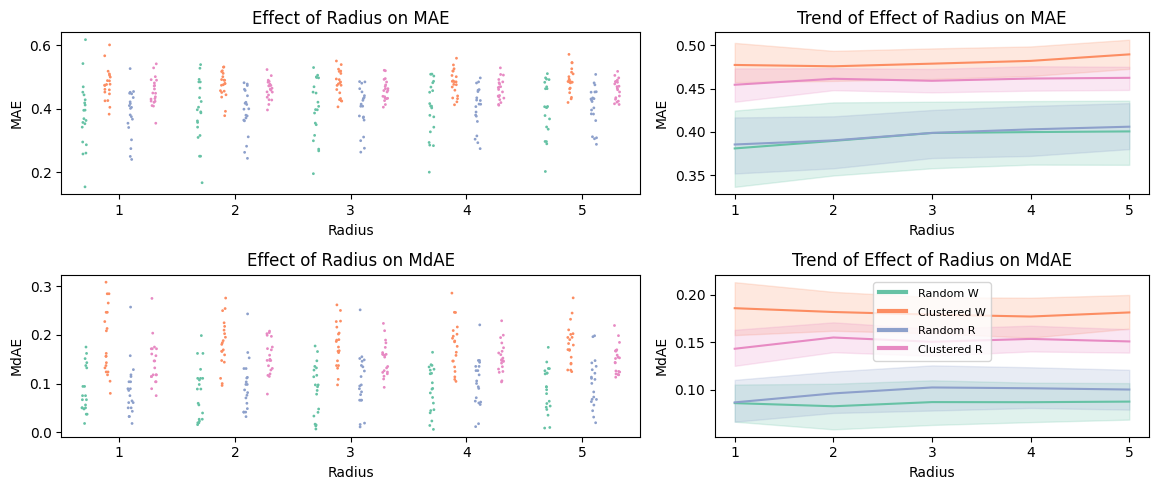

In [140]:
df1 = pd.read_csv('../experiments/analysis_out/abundances_temporal_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/abundances_temporal_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
df2['sampling_strat'] = 'reg'
df_combined = pd.concat([df1, df2])
df_combined['setup'] = df_combined["distribution"] + df_combined["sampling_strat"]

fig = plt.figure(figsize=(11.69,5))

gs = GridSpec(2, 2, width_ratios=[4, 3], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax1, legend=False)
ax1.set_title('Effect of Radius on MAE')
ax1.set_xlabel('Radius')
ax1.set_ylabel('MAE')

g = sns.lineplot(x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax2, legend=False)
ax2.set_title('Trend of Effect of Radius on MAE')
ax2.set_xlabel('Radius')
ax2.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax3, legend=False)
ax3.set_title('Effect of Radius on MdAE')
ax3.set_xlabel('Radius')
ax3.set_ylabel('MdAE')

g = sns.lineplot(x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax4)
ax4.set_title('Trend of Effect of Radius on MdAE')
ax4.set_xlabel('Radius')
ax4.set_ylabel('MdAE')
g.set_xticks([1, 2, 3, 4, 5])
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
new_labels = ['Random W', 'Clustered W', 'Random R', 'Clustered R']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')

# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
plt.savefig("5-abundances_temporal.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Diversity

## Sample

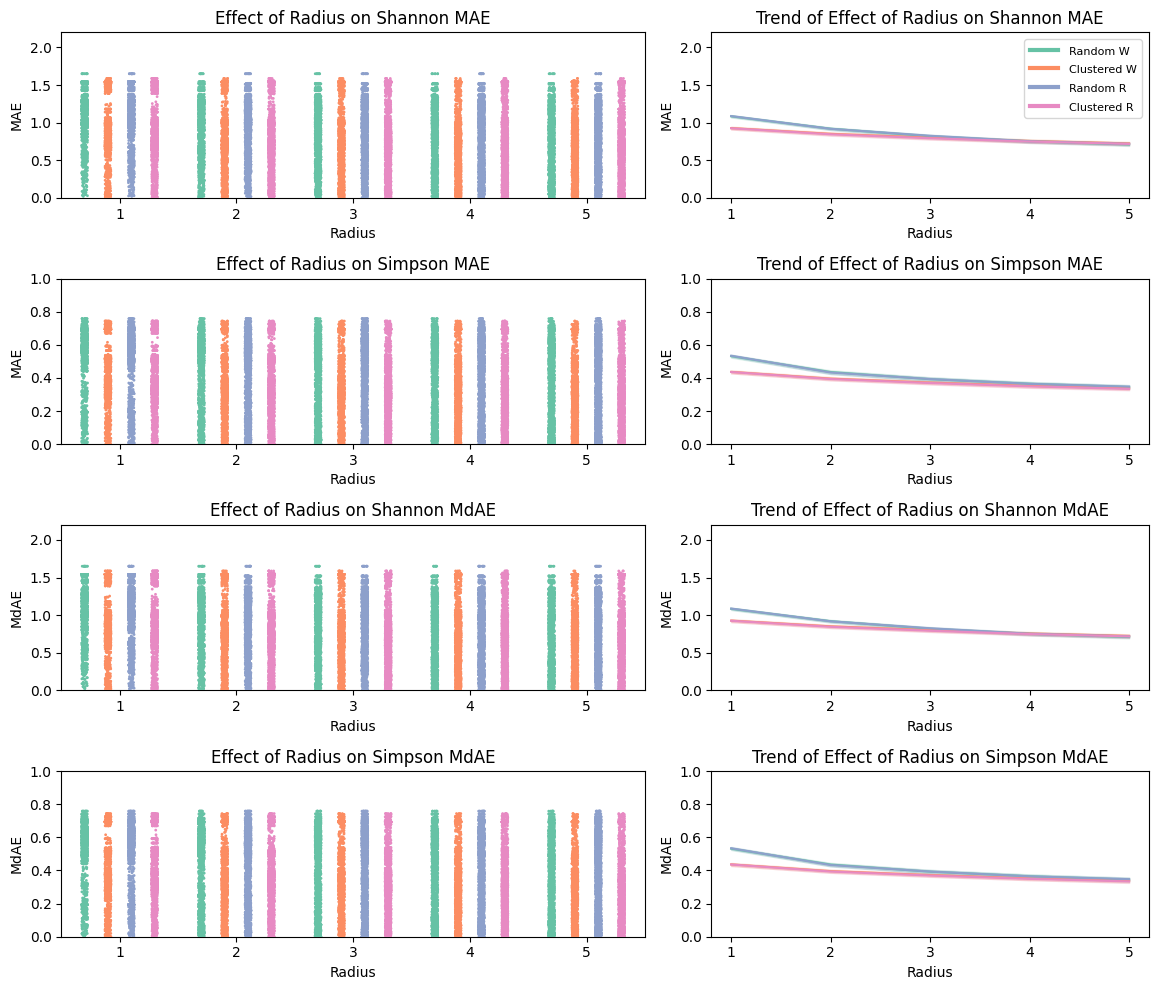

In [141]:
df1 = pd.read_csv('../experiments/analysis_out/diversity_indices_sample_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/diversity_indices_sample_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
df2['sampling_strat'] = 'reg'
df_combined = pd.concat([df1, df2])
df_combined['setup'] = df_combined["distribution"] + df_combined["sampling_strat"]

fig = plt.figure(figsize=(11.69,10))

gs = GridSpec(4, 2, width_ratios=[4, 3], height_ratios=[1, 1, 1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])
ax5 = fig.add_subplot(gs[4])
ax6 = fig.add_subplot(gs[5])
ax7 = fig.add_subplot(gs[6])
ax8 = fig.add_subplot(gs[7])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax1, legend=False)
ax1.set_title('Effect of Radius on Shannon MAE')
ax1.set_xlabel('Radius')
ax1.set_ylabel('MAE')
ax1.set_ybound(0, 2.2)

g = sns.lineplot(x='r', y='mae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax2, legend=True)
ax2.set_title('Trend of Effect of Radius on Shannon MAE')
ax2.set_xlabel('Radius')
ax2.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])
ax2.set_ybound(0, 2.2)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
new_labels = ['Random W', 'Clustered W', 'Random R', 'Clustered R']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax3, legend=False)
ax3.set_title('Effect of Radius on Simpson MAE')
ax3.set_xlabel('Radius')
ax3.set_ylabel('MAE')
ax3.set_ybound(0, 1)

g = sns.lineplot(x='r', y='mae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax4, legend=False)
ax4.set_title('Trend of Effect of Radius on Simpson MAE')
ax4.set_xlabel('Radius')
ax4.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])
ax4.set_ybound(0, 1)
    
sns.stripplot(size=2, dodge=True, x='r', y='mdae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax5, legend=False)
ax5.set_title('Effect of Radius on Shannon MdAE')
ax5.set_xlabel('Radius')
ax5.set_ylabel('MdAE')
ax5.set_ybound(0, 2.2)

g = sns.lineplot(x='r', y='mdae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax6, legend=False)
ax6.set_title('Trend of Effect of Radius on Shannon MdAE')
ax6.set_xlabel('Radius')
ax6.set_ylabel('MdAE')
g.set_xticks([1, 2, 3, 4, 5])
ax6.set_ybound(0, 2.2)

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mdae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax7, legend=False)
ax7.set_title('Effect of Radius on Simpson MdAE')
ax7.set_xlabel('Radius')
ax7.set_ylabel('MdAE')
ax7.set_ybound(0, 1)

g = sns.lineplot(x='r', y='mdae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax8, legend=False)
ax8.set_title('Trend of Effect of Radius on Simpson MdAE')
ax8.set_xlabel('Radius')
ax8.set_ylabel('MdAE')
g.set_xticks([1, 2, 3, 4, 5])
ax8.set_ybound(0, 1)    
# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
plt.savefig("5-diversity_indices_sample.pdf", format="pdf", bbox_inches="tight")
plt.show()

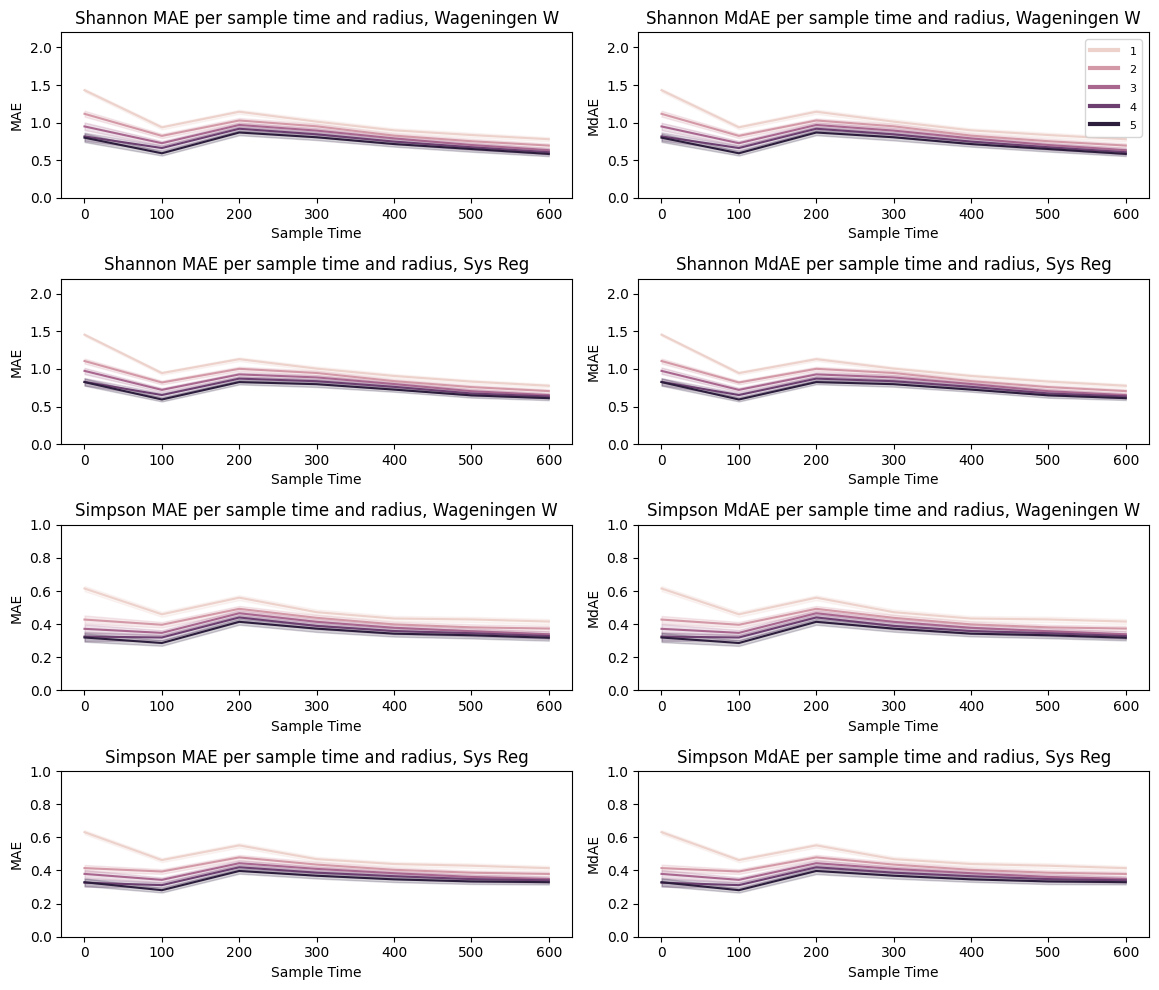

In [151]:
df1 = pd.read_csv('../experiments/analysis_out/diversity_indices_sample_w.csv')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/diversity_indices_sample_reg.csv')
df2['sampling_strat'] = 'reg'
# Combine df1 and df2 into a single DataFrame
df_combined = pd.concat([df1, df2])
# Set up the matplotlib figure with a 4x4 grid (2x2 plots: mae_w, mae_reg, mdae_w, mdae_reg)
fig, axes = plt.subplots(4, 2, figsize=(11.69,10))

# Plot [mae, w]
sns.lineplot(x='sample_time', y='mae_sh', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Shannon MAE per sample time and radius, Wageningen W')
axes[0, 0].set_xlabel('Sample Time')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_ybound(0, 2.2)

## Plot [mae, reg]
g = sns.lineplot(x='sample_time', y='mdae_sh', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 1])
axes[0, 1].set_title('Shannon MdAE per sample time and radius, Wageningen W')
axes[0, 1].set_xlabel('Sample Time')
axes[0, 1].set_ylabel('MdAE')
axes[0, 1].set_ybound(0, 2.2)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
for t in g.legend_.texts:
    t.set_fontsize('8')
    
#
## Plot [mdae, w]
sns.lineplot(x='sample_time', y='mae_sh', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Shannon MAE per sample time and radius, Sys Reg')
axes[1, 0].set_xlabel('Sample Time')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_ybound(0, 2.2)
#
## Plot [mae, reg]
sns.lineplot(x='sample_time', y='mdae_sh', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Shannon MdAE per sample time and radius, Sys Reg')
axes[1, 1].set_xlabel('Sample Time')
axes[1, 1].set_ylabel('MdAE')
axes[1, 1].set_ybound(0, 2.2)

# Plot [mae, w]
sns.lineplot(x='sample_time', y='mae_si', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[2, 0], legend=False)
axes[2, 0].set_title('Simpson MAE per sample time and radius, Wageningen W')
axes[2, 0].set_xlabel('Sample Time')
axes[2, 0].set_ylabel('MAE')
axes[2, 0].set_ybound(0, 1)

## Plot [mae, reg]
g = sns.lineplot(x='sample_time', y='mdae_si', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[2, 1], legend=False)
axes[2, 1].set_title('Simpson MdAE per sample time and radius, Wageningen W')
axes[2, 1].set_xlabel('Sample Time')
axes[2, 1].set_ylabel('MdAE')
axes[2, 1].set_ybound(0, 1)
    
#
## Plot [mdae, w]
sns.lineplot(x='sample_time', y='mae_si', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[3, 0], legend=False)
axes[3, 0].set_title('Simpson MAE per sample time and radius, Sys Reg')
axes[3, 0].set_xlabel('Sample Time')
axes[3, 0].set_ylabel('MAE')
axes[3, 0].set_ybound(0, 1)
#
## Plot [mae, reg]
sns.lineplot(x='sample_time', y='mdae_si', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[3, 1], legend=False)
axes[3, 1].set_title('Simpson MdAE per sample time and radius, Sys Reg')
axes[3, 1].set_xlabel('Sample Time')
axes[3, 1].set_ylabel('MdAE')
axes[3, 1].set_ybound(0, 1)

# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
#plt.suptitle('Diversity No Pooling', y=1.05)
plt.savefig("5-diversity_indices_st_sample.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Plot

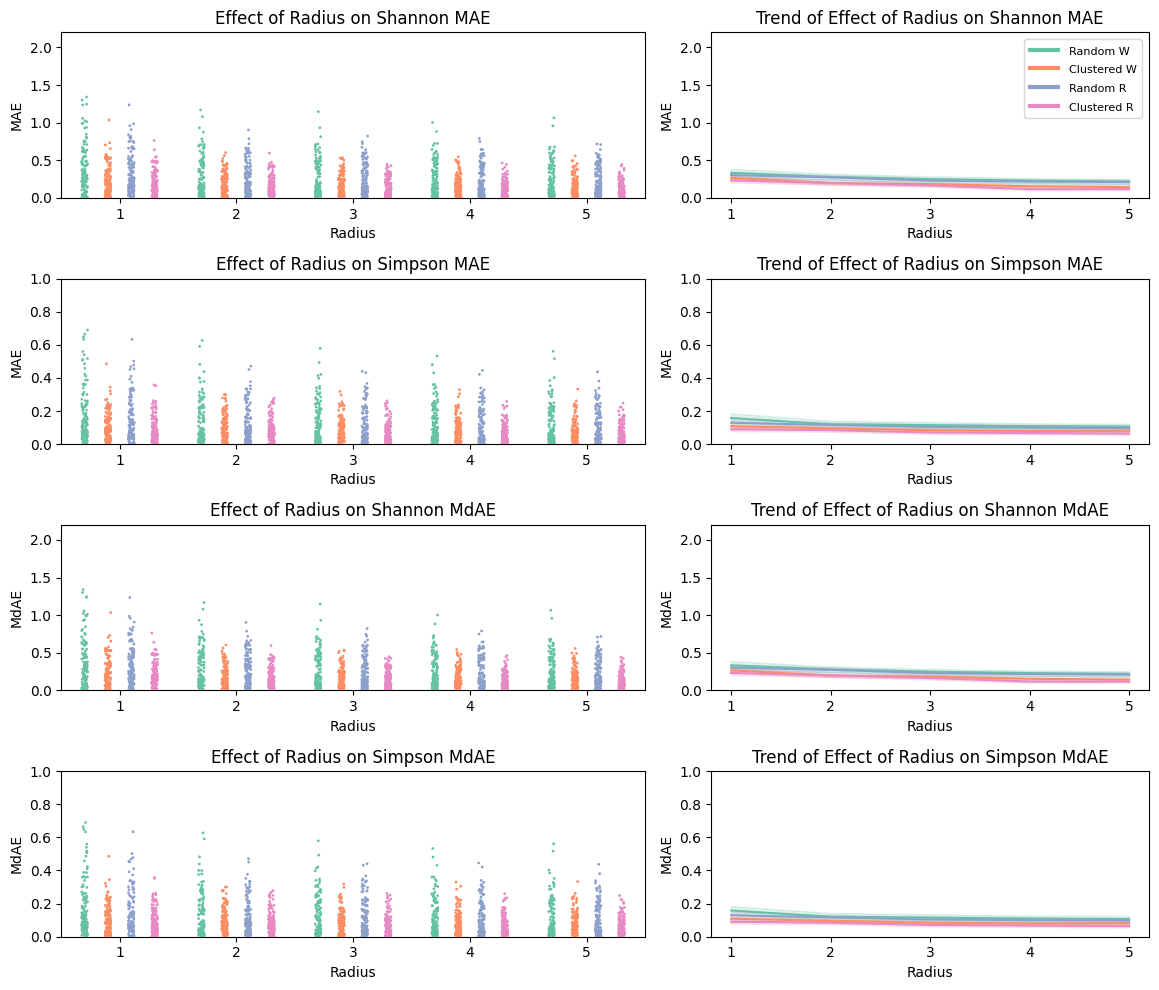

In [143]:
df1 = pd.read_csv('../experiments/analysis_out/diversity_indices_plot_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/diversity_indices_plot_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
df2['sampling_strat'] = 'reg'
df_combined = pd.concat([df1, df2])
df_combined['setup'] = df_combined["distribution"] + df_combined["sampling_strat"]

fig = plt.figure(figsize=(11.69,10))

gs = GridSpec(4, 2, width_ratios=[4, 3], height_ratios=[1, 1, 1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])
ax5 = fig.add_subplot(gs[4])
ax6 = fig.add_subplot(gs[5])
ax7 = fig.add_subplot(gs[6])
ax8 = fig.add_subplot(gs[7])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax1, legend=False)
ax1.set_title('Effect of Radius on Shannon MAE')
ax1.set_xlabel('Radius')
ax1.set_ylabel('MAE')
ax1.set_ybound(0, 2.2)

g = sns.lineplot(x='r', y='mae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax2, legend=True)
ax2.set_title('Trend of Effect of Radius on Shannon MAE')
ax2.set_xlabel('Radius')
ax2.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])
ax2.set_ybound(0, 2.2)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
new_labels = ['Random W', 'Clustered W', 'Random R', 'Clustered R']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax3, legend=False)
ax3.set_title('Effect of Radius on Simpson MAE')
ax3.set_xlabel('Radius')
ax3.set_ylabel('MAE')
ax3.set_ybound(0, 1)

g = sns.lineplot(x='r', y='mae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax4, legend=False)
ax4.set_title('Trend of Effect of Radius on Simpson MAE')
ax4.set_xlabel('Radius')
ax4.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])
ax4.set_ybound(0, 1)
    
sns.stripplot(size=2, dodge=True, x='r', y='mdae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax5, legend=False)
ax5.set_title('Effect of Radius on Shannon MdAE')
ax5.set_xlabel('Radius')
ax5.set_ylabel('MdAE')
ax5.set_ybound(0, 2.2)

g = sns.lineplot(x='r', y='mdae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax6, legend=False)
ax6.set_title('Trend of Effect of Radius on Shannon MdAE')
ax6.set_xlabel('Radius')
ax6.set_ylabel('MdAE')
g.set_xticks([1, 2, 3, 4, 5])
ax6.set_ybound(0, 2.2)

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mdae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax7, legend=False)
ax7.set_title('Effect of Radius on Simpson MdAE')
ax7.set_xlabel('Radius')
ax7.set_ylabel('MdAE')
ax7.set_ybound(0, 1)

g = sns.lineplot(x='r', y='mdae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax8, legend=False)
ax8.set_title('Trend of Effect of Radius on Simpson MdAE')
ax8.set_xlabel('Radius')
ax8.set_ylabel('MdAE')
g.set_xticks([1, 2, 3, 4, 5])
ax8.set_ybound(0, 1)    
# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
plt.savefig("5-diversity_indices_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

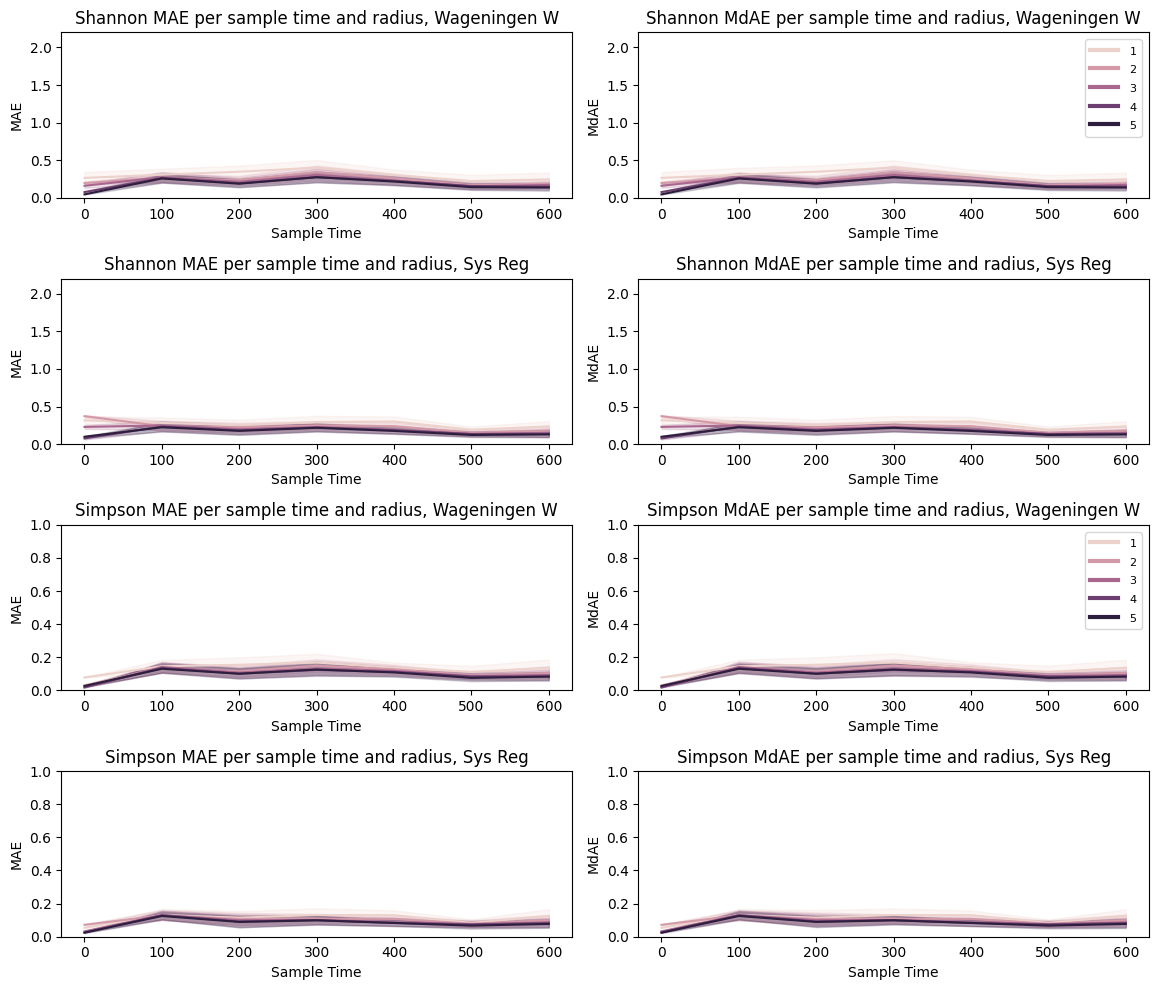

In [144]:
df1 = pd.read_csv('../experiments/analysis_out/diversity_indices_plot_w.csv')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/diversity_indices_plot_reg.csv')
df2['sampling_strat'] = 'reg'
# Combine df1 and df2 into a single DataFrame
df_combined = pd.concat([df1, df2])
# Set up the matplotlib figure with a 4x4 grid (2x2 plots: mae_w, mae_reg, mdae_w, mdae_reg)
fig, axes = plt.subplots(4, 2, figsize=(11.69,10))

# Plot [mae, w]
sns.lineplot(x='sample_time', y='mae_sh', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Shannon MAE per sample time and radius, Wageningen W')
axes[0, 0].set_xlabel('Sample Time')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_ybound(0, 2.2)

## Plot [mae, reg]
g = sns.lineplot(x='sample_time', y='mdae_sh', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 1])
axes[0, 1].set_title('Shannon MdAE per sample time and radius, Wageningen W')
axes[0, 1].set_xlabel('Sample Time')
axes[0, 1].set_ylabel('MdAE')
axes[0, 1].set_ybound(0, 2.2)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
for t in g.legend_.texts:
    t.set_fontsize('8')
    
#
## Plot [mdae, w]
sns.lineplot(x='sample_time', y='mae_sh', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Shannon MAE per sample time and radius, Sys Reg')
axes[1, 0].set_xlabel('Sample Time')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_ybound(0, 2.2)
#
## Plot [mae, reg]
sns.lineplot(x='sample_time', y='mdae_sh', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Shannon MdAE per sample time and radius, Sys Reg')
axes[1, 1].set_xlabel('Sample Time')
axes[1, 1].set_ylabel('MdAE')
axes[1, 1].set_ybound(0, 2.2)

# Plot [mae, w]
sns.lineplot(x='sample_time', y='mae_si', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[2, 0], legend=False)
axes[2, 0].set_title('Simpson MAE per sample time and radius, Wageningen W')
axes[2, 0].set_xlabel('Sample Time')
axes[2, 0].set_ylabel('MAE')
axes[2, 0].set_ybound(0, 1)

## Plot [mae, reg]
g = sns.lineplot(x='sample_time', y='mdae_si', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[2, 1], legend=False)
axes[2, 1].set_title('Simpson MdAE per sample time and radius, Wageningen W')
axes[2, 1].set_xlabel('Sample Time')
axes[2, 1].set_ylabel('MdAE')
axes[2, 1].set_ybound(0, 1)
#
## Plot [mdae, w]
sns.lineplot(x='sample_time', y='mae_si', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[3, 0], legend=False)
axes[3, 0].set_title('Simpson MAE per sample time and radius, Sys Reg')
axes[3, 0].set_xlabel('Sample Time')
axes[3, 0].set_ylabel('MAE')
axes[3, 0].set_ybound(0, 1)
#
## Plot [mae, reg]
sns.lineplot(x='sample_time', y='mdae_si', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[3, 1], legend=False)
axes[3, 1].set_title('Simpson MdAE per sample time and radius, Sys Reg')
axes[3, 1].set_xlabel('Sample Time')
axes[3, 1].set_ylabel('MdAE')
axes[3, 1].set_ybound(0, 1)

# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
#plt.suptitle('Diversity Intra Plot Pooling', y=1.05)
plt.savefig("5-diversity_indices_st_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Temporal

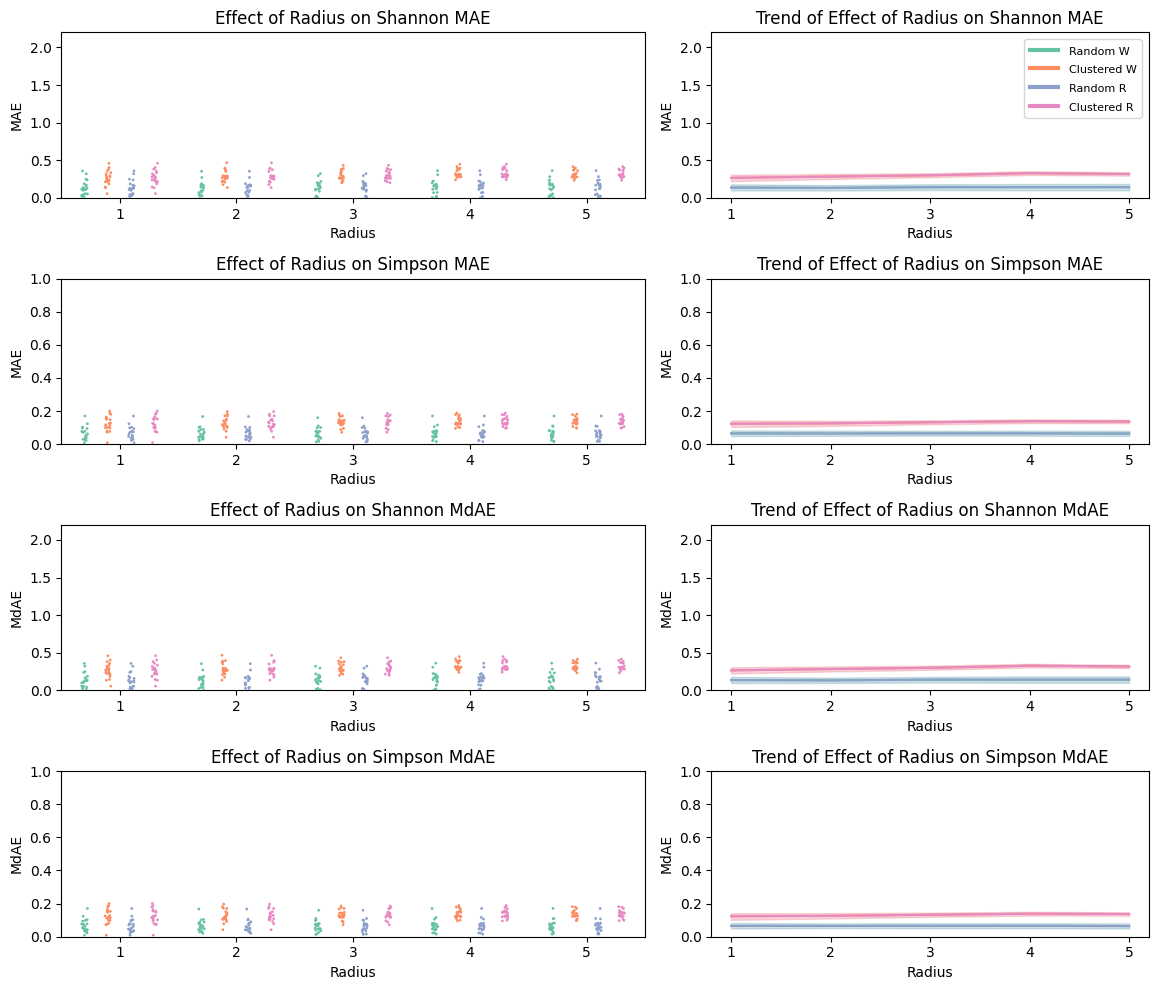

In [145]:
df1 = pd.read_csv('../experiments/analysis_out/diversity_indices_temporal_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/diversity_indices_temporal_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
df2['sampling_strat'] = 'reg'
df_combined = pd.concat([df1, df2])
df_combined['setup'] = df_combined["distribution"] + df_combined["sampling_strat"]

fig = plt.figure(figsize=(11.69,10))

gs = GridSpec(4, 2, width_ratios=[4, 3], height_ratios=[1, 1, 1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])
ax5 = fig.add_subplot(gs[4])
ax6 = fig.add_subplot(gs[5])
ax7 = fig.add_subplot(gs[6])
ax8 = fig.add_subplot(gs[7])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax1, legend=False)
ax1.set_title('Effect of Radius on Shannon MAE')
ax1.set_xlabel('Radius')
ax1.set_ylabel('MAE')
ax1.set_ybound(0, 2.2)

g = sns.lineplot(x='r', y='mae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax2, legend=True)
ax2.set_title('Trend of Effect of Radius on Shannon MAE')
ax2.set_xlabel('Radius')
ax2.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])
ax2.set_ybound(0, 2.2)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
new_labels = ['Random W', 'Clustered W', 'Random R', 'Clustered R']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax3, legend=False)
ax3.set_title('Effect of Radius on Simpson MAE')
ax3.set_xlabel('Radius')
ax3.set_ylabel('MAE')
ax3.set_ybound(0, 1)

g = sns.lineplot(x='r', y='mae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax4, legend=False)
ax4.set_title('Trend of Effect of Radius on Simpson MAE')
ax4.set_xlabel('Radius')
ax4.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])
ax4.set_ybound(0, 1)
    
sns.stripplot(size=2, dodge=True, x='r', y='mdae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax5, legend=False)
ax5.set_title('Effect of Radius on Shannon MdAE')
ax5.set_xlabel('Radius')
ax5.set_ylabel('MdAE')
ax5.set_ybound(0, 2.2)

g = sns.lineplot(x='r', y='mdae_sh', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax6, legend=False)
ax6.set_title('Trend of Effect of Radius on Shannon MdAE')
ax6.set_xlabel('Radius')
ax6.set_ylabel('MdAE')
g.set_xticks([1, 2, 3, 4, 5])
ax6.set_ybound(0, 2.2)

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mdae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax7, legend=False)
ax7.set_title('Effect of Radius on Simpson MdAE')
ax7.set_xlabel('Radius')
ax7.set_ylabel('MdAE')
ax7.set_ybound(0, 1)

g = sns.lineplot(x='r', y='mdae_si', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax8, legend=False)
ax8.set_title('Trend of Effect of Radius on Simpson MdAE')
ax8.set_xlabel('Radius')
ax8.set_ylabel('MdAE')
g.set_xticks([1, 2, 3, 4, 5])
ax8.set_ybound(0, 1)    
# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
plt.savefig("5-diversity_indices_temporal.pdf", format="pdf", bbox_inches="tight")
plt.show()

# D-Index

## Sample

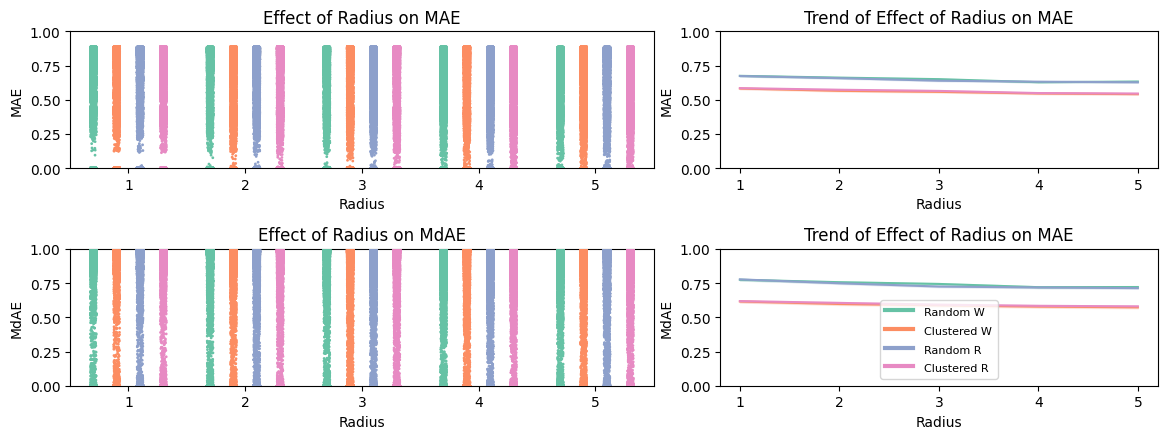

In [146]:
df1 = pd.read_csv('../experiments/analysis_out/d_index_sample_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/d_index_sample_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
df2['sampling_strat'] = 'reg'
df_combined = pd.concat([df1, df2])
df_combined['setup'] = df_combined["distribution"] + df_combined["sampling_strat"]

fig = plt.figure(figsize=(11.69,4.5))

gs = GridSpec(2, 2, width_ratios=[4, 3], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax1, legend=False)
ax1.set_title('Effect of Radius on MAE')
ax1.set_xlabel('Radius')
ax1.set_ylabel('MAE')
ax1.set_ybound(0,1)

g = sns.lineplot(x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax2, legend=False)
ax2.set_title('Trend of Effect of Radius on MAE')
ax2.set_xlabel('Radius')
ax2.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])
ax2.set_ybound(0,1)

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax3, legend=False)
ax3.set_title('Effect of Radius on MdAE')
ax3.set_xlabel('Radius')
ax3.set_ylabel('MdAE')
ax3.set_ybound(0,1)

g = sns.lineplot(x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax4)
ax4.set_title('Trend of Effect of Radius on MAE')
ax4.set_xlabel('Radius')
ax4.set_ylabel('MdAE')
g.set_xticks([1, 2, 3, 4, 5])
ax4.set_ybound(0,1)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
new_labels = ['Random W', 'Clustered W', 'Random R', 'Clustered R']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')

# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
plt.savefig("5-d_index_sample.pdf", format="pdf", bbox_inches="tight")
plt.show()

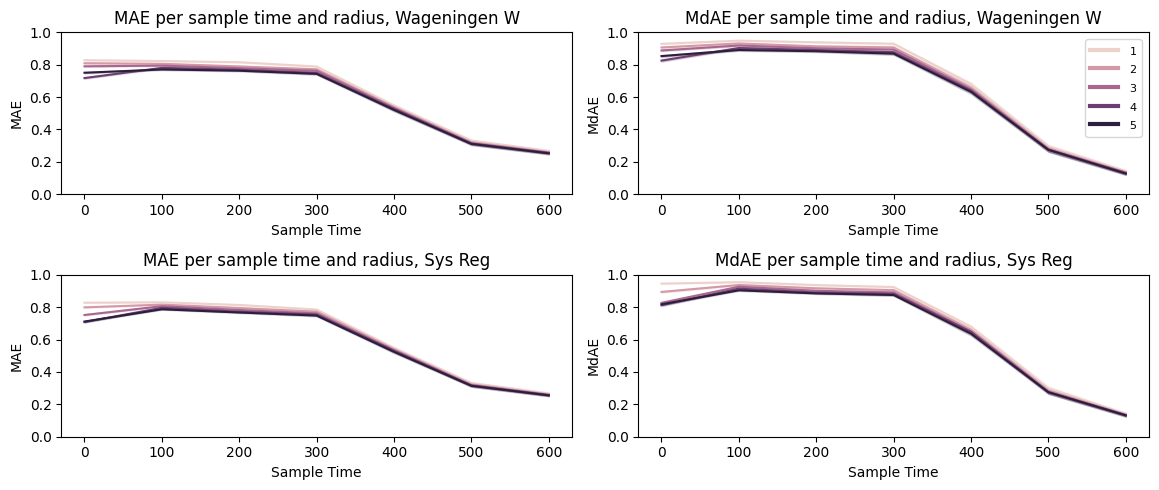

In [147]:
df1 = pd.read_csv('../experiments/analysis_out/d_index_sample_w.csv')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/d_index_sample_reg.csv')
df2['sampling_strat'] = 'reg'
# Combine df1 and df2 into a single DataFrame
df_combined = pd.concat([df1, df2])

# Set up the matplotlib figure with a 4x4 grid (2x2 plots: mae_w, mae_reg, mdae_w, mdae_reg)
fig, axes = plt.subplots(2, 2, figsize=(11.69,5))

# Plot [mae, w]
sns.lineplot(x='sample_time', y='mae', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 0], legend=False)
axes[0, 0].set_title('MAE per sample time and radius, Wageningen W')
axes[0, 0].set_xlabel('Sample Time')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_ybound(0, 1)

## Plot [mae, reg]
g = sns.lineplot(x='sample_time', y='mdae', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 1])
axes[0, 1].set_title('MdAE per sample time and radius, Wageningen W')
axes[0, 1].set_xlabel('Sample Time')
axes[0, 1].set_ylabel('MdAE')
axes[0, 1].set_ybound(0, 1)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
for t in g.legend_.texts:
    t.set_fontsize('8')
    
#
## Plot [mdae, w]
sns.lineplot(x='sample_time', y='mae', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 0], legend=False)
axes[1, 0].set_title('MAE per sample time and radius, Sys Reg')
axes[1, 0].set_xlabel('Sample Time')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_ybound(0, 1)
#
## Plot [mae, reg]
sns.lineplot(x='sample_time', y='mdae', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 1], legend=False)
axes[1, 1].set_title('MdAE per sample time and radius, Sys Reg')
axes[1, 1].set_xlabel('Sample Time')
axes[1, 1].set_ylabel('MdAE')
axes[1, 1].set_ybound(0, 1)

# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
#plt.suptitle('D Index No Pooling', y=1.05)
plt.savefig("5-d_index_st_sample.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Plot

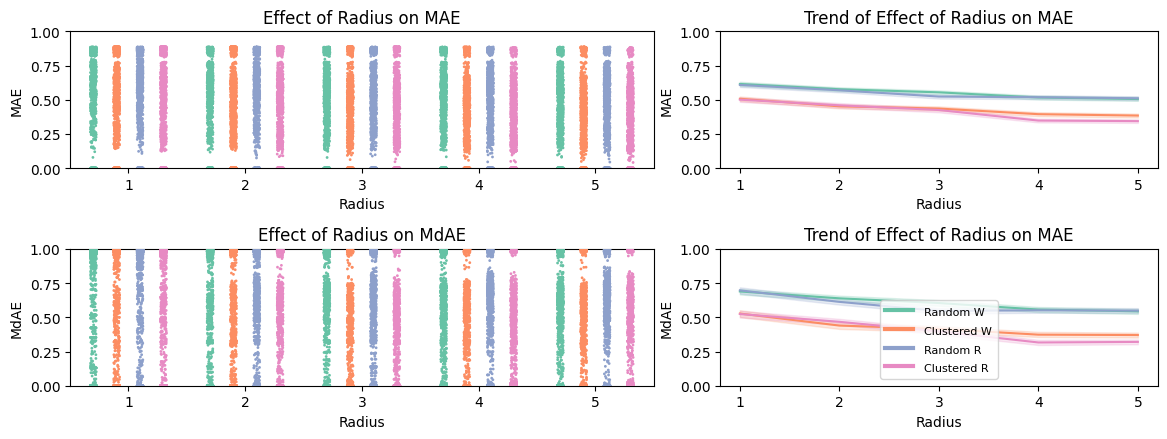

In [148]:
df1 = pd.read_csv('../experiments/analysis_out/d_index_plot_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/d_index_plot_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
df2['sampling_strat'] = 'reg'
df_combined = pd.concat([df1, df2])
df_combined['setup'] = df_combined["distribution"] + df_combined["sampling_strat"]

fig = plt.figure(figsize=(11.69,4.5))

gs = GridSpec(2, 2, width_ratios=[4, 3], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax1, legend=False)
ax1.set_title('Effect of Radius on MAE')
ax1.set_xlabel('Radius')
ax1.set_ylabel('MAE')
ax1.set_ybound(0,1)

g = sns.lineplot(x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax2, legend=False)
ax2.set_title('Trend of Effect of Radius on MAE')
ax2.set_xlabel('Radius')
ax2.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])
ax2.set_ybound(0,1)

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax3, legend=False)
ax3.set_title('Effect of Radius on MdAE')
ax3.set_xlabel('Radius')
ax3.set_ylabel('MdAE')
ax3.set_ybound(0,1)

g = sns.lineplot(x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax4)
ax4.set_title('Trend of Effect of Radius on MAE')
ax4.set_xlabel('Radius')
ax4.set_ylabel('MdAE')
ax4.set_ybound(0,1)
g.set_xticks([1, 2, 3, 4, 5])
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
new_labels = ['Random W', 'Clustered W', 'Random R', 'Clustered R']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')

# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
plt.savefig("5-d_index_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

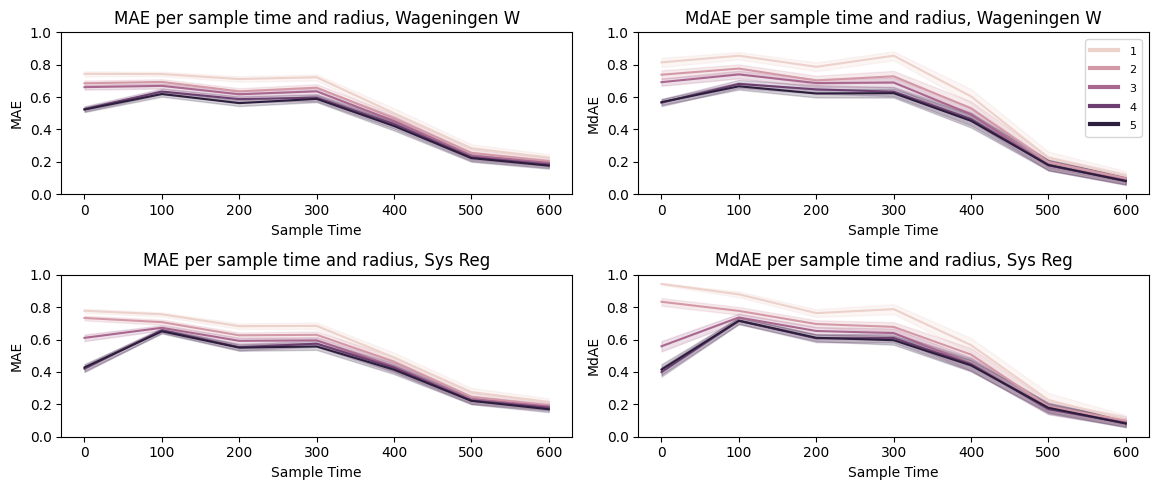

In [149]:
df1 = pd.read_csv('../experiments/analysis_out/d_index_plot_w.csv')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/d_index_plot_reg.csv')
df2['sampling_strat'] = 'reg'
# Combine df1 and df2 into a single DataFrame
df_combined = pd.concat([df1, df2])

# Set up the matplotlib figure with a 4x4 grid (2x2 plots: mae_w, mae_reg, mdae_w, mdae_reg)
fig, axes = plt.subplots(2, 2, figsize=(11.69,5))

# Plot [mae, w]
sns.lineplot(x='sample_time', y='mae', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 0], legend=False)
axes[0, 0].set_title('MAE per sample time and radius, Wageningen W')
axes[0, 0].set_xlabel('Sample Time')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_ybound(0, 1)

## Plot [mae, reg]
g = sns.lineplot(x='sample_time', y='mdae', hue='r', data=df_combined[df_combined['sampling_strat']=='w'], ax=axes[0, 1])
axes[0, 1].set_title('MdAE per sample time and radius, Wageningen W')
axes[0, 1].set_xlabel('Sample Time')
axes[0, 1].set_ylabel('MdAE')
axes[0, 1].set_ybound(0, 1)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
for t in g.legend_.texts:
    t.set_fontsize('8')
    
#
## Plot [mdae, w]
sns.lineplot(x='sample_time', y='mae', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 0], legend=False)
axes[1, 0].set_title('MAE per sample time and radius, Sys Reg')
axes[1, 0].set_xlabel('Sample Time')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_ybound(0, 1)
#
## Plot [mae, reg]
sns.lineplot(x='sample_time', y='mdae', hue='r', data=df_combined[df_combined['sampling_strat']=='reg'], ax=axes[1, 1], legend=False)
axes[1, 1].set_title('MdAE per sample time and radius, Sys Reg')
axes[1, 1].set_xlabel('Sample Time')
axes[1, 1].set_ylabel('MdAE')
axes[1, 1].set_ybound(0, 1)

plt.tight_layout()
#plt.suptitle('D Index Intra Plot Pooling', y=1.05)
plt.savefig("5-d_index_st_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Temporal

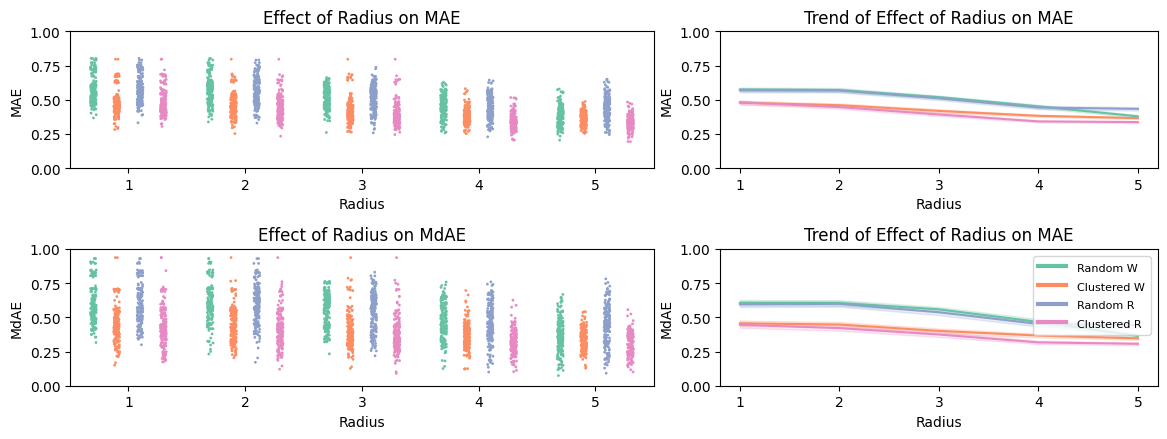

In [150]:
df1 = pd.read_csv('../experiments/analysis_out/d_index_temporal_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/d_index_temporal_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
df2['sampling_strat'] = 'reg'
df_combined = pd.concat([df1, df2])
df_combined['setup'] = df_combined["distribution"] + df_combined["sampling_strat"]

fig = plt.figure(figsize=(11.69,4.5))

gs = GridSpec(2, 2, width_ratios=[4, 3], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax1, legend=False)
ax1.set_title('Effect of Radius on MAE')
ax1.set_xlabel('Radius')
ax1.set_ylabel('MAE')
ax1.set_ybound(0,1)

g = sns.lineplot(x='r', y='mae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax2, legend=False)
ax2.set_title('Trend of Effect of Radius on MAE')
ax2.set_xlabel('Radius')
ax2.set_ylabel('MAE')
g.set_xticks([1, 2, 3, 4, 5])
ax2.set_ybound(0,1)

# Plot [mae, w]
sns.stripplot(size=2, dodge=True, x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax3, legend=False)
ax3.set_title('Effect of Radius on MdAE')
ax3.set_xlabel('Radius')
ax3.set_ylabel('MdAE')
ax3.set_ybound(0,1)

g = sns.lineplot(x='r', y='mdae', hue='setup', palette=sns.color_palette("Set2")[:4], data=df_combined, ax=ax4)
ax4.set_title('Trend of Effect of Radius on MAE')
ax4.set_xlabel('Radius')
ax4.set_ylabel('MdAE')
ax4.set_ybound(0,1)
g.set_xticks([1, 2, 3, 4, 5])
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
new_labels = ['Random W', 'Clustered W', 'Random R', 'Clustered R']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')
# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
plt.savefig("5-d_index_temporal.pdf", format="pdf", bbox_inches="tight")
plt.show()